4. Transpose the ORL face dataset to let 𝐗 be a 2576 × 400 data matrix. Apply PCA to 𝐗, using the PCA function you created in EX3 above.

In [ ]:
from PIL import Image
import numpy as np
from numpy import array
from tkinter import _flatten
import math
import matplotlib.pyplot as plt
import os


In [ ]:
import numpy

# 1 - 0, 2 - 1, 3 - 1, 4 - 1, 5 - 1, 6 - 1, 7 - 1, 8 - 0, 9 - 1, 10 - 0, 11 - 1, 12 - 0, 13 - 1, 14 - 1, 15 - 1
# 16 - 1, 17 - 1, 18 - 1, 19 - 1, 20 - 1, 21 - 1, 22 - 1, 23 - 1, 24 - 1, 25 - 1, 26 - 1, 27 - 1, 28 - 1, 29 - 1, 30 - 1
# 31 - 1, 32 - 0, 33 - 1, 34 - 1, 35 - 1, 36 - 1, 37 - 1, 38 - 1, 39 - 1, 40 - 1  
gender = [0, 1, 1, 1, 1, 1, 1, 0, 1, 0,1, 0, 1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1]
len(gender)

final = []
for i in gender:
  if i == 0:
    for j in range(0,10):
      final.append(0)
    #new_list = [0,0,0,0,0,0,0,0,0,0]
  else:
    for j in range(0,10):
      final.append(1)


 
gender = np.asarray(final)
gender = np.expand_dims(gender, axis=1)
gender.shape




(400, 1)

In [ ]:
from PIL import Image


def load_images_from_folder(folder):
  i = 1
  for filename in os.listdir(folder):
    im = Image.open(os.path.join(folder,filename))
    data = np.array(im)
    flattened = data.flatten()
    reshape_fla = np.expand_dims(flattened, axis=0)
    if i == 1:
      final = reshape_fla
      i = 2
    else:
      final = np.vstack((final,reshape_fla))

  return final


pixels = load_images_from_folder('/content/drive/MyDrive/Colab Notebooks/homework_6/faces')

pixels.shape

X = pixels

a. (10%) How many principal components are needed to explain 50%, 60%, 70%, 80%, and 90% of the total
variance?

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import StandardScaler


In [ ]:

def fa_function(X, num_feat):

  x_std = StandardScaler().fit_transform(X)
  features = x_std.T 
  covariance_matrix = np.cov(features)
  eig_vals, eig_vecs = np.linalg.eig(covariance_matrix)
  sel_eig_vals = eig_vals[:num_feat]
  eig_vals_diag = np.zeros((eig_vals.shape[0], eig_vals.shape[0]), float) 
  np.fill_diagonal(eig_vals_diag, eig_vals) 
  eig_vals_diagsqrt = np.sqrt(eig_vals_diag)
  All_T = eig_vals_diag @ eig_vecs
  All = All_T.T
  X_variance = np.diag(np.diag(All_T @ All))
  eig_vals_diag = np.zeros((num_feat, num_feat), float) 
  np.fill_diagonal(eig_vals_diag, eig_vals[:num_feat]) 
  eig_vals_diagsqrt = np.sqrt(eig_vals_diag)
  A_T = eig_vecs[:, :num_feat] @ eig_vals_diagsqrt
  A = A_T.T
  psi = X_variance - A_T @ A
  inverse_psi = np.linalg.inv(psi)
  inner = np.linalg.inv(A @ (inverse_psi) @ (A_T))
  F = X @ inverse_psi @ (A_T) @ (inner)
  communality_vector = np.diag(A_T @ A)
  return F, A, communality_vector, psi, eig_vals, eig_vecs, sel_eig_vals


In [ ]:
F, A, communality_vector, psi, eig_vals, eig_vecs, sel_eig_vals = fa_function(X.T, 2)


In [ ]:
def plot_eigvals(X): 

  count = 0
  x_axis=[]
  y_axis = []
  total_acc = 0


  for i in range(1,100):
    F, A, communality_vector, psi, eig_vals, eig_vecs, sel_eig_vals = fa_function(X.T, i)
    x_axis.append(i)

    sum_vals = eig_vals.sum()

    total_ = sel_eig_vals[i-1]/sum_vals

    total_acc = total_ + total_acc

    y_axis.append(total_acc*100)

   

    if total_acc > 0.5 and count == 0:
      print("it was necessary " + str(i) +" factors for 50% variance")
      count = 1
    
    elif total_acc> 0.6 and count == 1:
      print("it was necessary " + str(i) +" factors for 60% variance")
      count = 2

    elif total_acc > 0.7 and count == 2:
      print("it was necessary " + str(i) +" factors for 70% variance")
      count = 3

    elif total_acc > 0.8 and count == 3:
      print("it was necessary " + str(i) +" factors for 80% variance")
      count = 4  

    elif total_acc > 0.9 and count == 4:
      print("it was necessary " + str(i) +" factors for 90% variance")
      count = 5

  plt.plot(x_axis,y_axis)
  plt.show()




it was necessary 2 factors for 50% variance
it was necessary 4 factors for 60% variance
it was necessary 7 factors for 70% variance
it was necessary 17 factors for 80% variance
it was necessary 50 factors for 90% variance


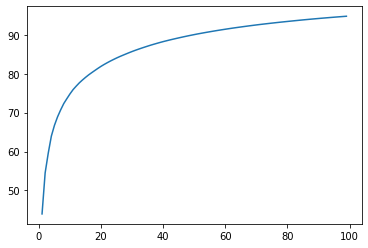

In [ ]:
plot_eigvals(X)


b. (10%) Rescale the first principal component (PC) into the range of [0, 255]. Reshape the first PC (initially
an 2576 × 1 vector) into a 46 × 56 matrix. Plot an image from the 46 × 56 matrix using the rescaled PC scores as the grayscale values.

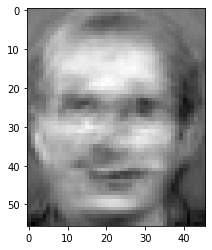

In [ ]:
F, A, communality_vector, psi, eig_vals, eig_vecs, sel_eig_vals = fa_function(X.T, 17)

FA_1 = F@A
FA_1=FA_1.T[0]
FA_1_array =FA_1.reshape(56,46).real
imgplot = plt.imshow(FA_1_array, cmap='gray')
plt.show()